Imports

In [63]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [64]:
data = pd.read_csv('./Churn Modeling.csv', index_col ="RowNumber")
data.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


One hot encoding for geography ans gender
And delete Surname

In [65]:
# Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# OneHot Encoding:
data = pd.get_dummies(data, columns=['Geography'], prefix='Geography')

In [66]:
data.head(5)

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [67]:
data['Geography_France'] = data['Geography_France'].astype(int)
data['Geography_Spain'] = data['Geography_Spain'].astype(int)
data['Geography_Germany'] = data['Geography_Germany'].astype(int)

In [68]:
data.drop('CustomerId', axis=1, inplace=True)
data.drop('Surname', axis=1, inplace=True)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,
1,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [69]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                data.drop('Exited', axis=1),
                data['Exited'],
                test_size=0.2,
                random_state=42)

Creating and training the model

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [71]:
model = Sequential([
      Dense(24, input_shape=(12,), activation='relu'),
      Dense(50, activation='relu'),
      Dense(30, activation='relu'),
      Dense(7, activation='relu'),
      Dense(2, activation='softmax')
])

In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 24)                312       
                                                                 
 dense_14 (Dense)            (None, 50)                1250      
                                                                 
 dense_15 (Dense)            (None, 30)                1530      
                                                                 
 dense_16 (Dense)            (None, 7)                 217       
                                                                 
 dense_17 (Dense)            (None, 2)                 16        
                                                                 
Total params: 3,325
Trainable params: 3,325
Non-trainable params: 0
_________________________________________________________________


In [73]:
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [74]:
model.compile(
    Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [75]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [76]:
X_train.shape

(8000, 12)

In [77]:
y_train.shape

(8000,)

In [78]:
X_test.shape

(2000, 12)

In [79]:
from keras.utils import to_categorical

# Convertir les étiquettes en vecteurs one-hot
y_train_categorical = to_categorical(y_train)

In [80]:
print(y_train_categorical)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [81]:
model.fit(X_train, y_train_categorical, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
720/720 [==============================] - 4s 4ms/step - loss: 0.4945 - accuracy: 0.7904 - val_loss: 0.4484 - val_accuracy: 0.8037
Epoch 2/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4516 - accuracy: 0.7983 - val_loss: 0.4281 - val_accuracy: 0.8125
Epoch 3/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4363 - accuracy: 0.8085 - val_loss: 0.4160 - val_accuracy: 0.8213
Epoch 4/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4245 - accuracy: 0.8158 - val_loss: 0.4081 - val_accuracy: 0.8238
Epoch 5/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4148 - accuracy: 0.8256 - val_loss: 0.4029 - val_accuracy: 0.8338
Epoch 6/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4052 - accuracy: 0.8310 - val_loss: 0.3963 - val_accuracy: 0.8388
Epoch 7/100
720/720 [==============================] - 3s 4ms/step - loss: 0.3975 - accuracy: 0.8332 - val_loss: 0.3916 - val_accuracy: 0.8413

In [82]:
import numpy as np
predictions = model.predict(X_test)
y_pred_classes = np.argmax(predictions, axis=1)
accuracy = np.mean(y_pred_classes == y_test)
print("Exactitude (accuracy) :", accuracy)

63/63 [==============================] - 0s 3ms/step
Exactitude (accuracy) : 0.855


In [83]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [84]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without Normalization")

    print(cm)

    thresh = cm.max() / 2.0

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

Confusion Matrix without Normalization
[[1509   98]
 [ 192  201]]


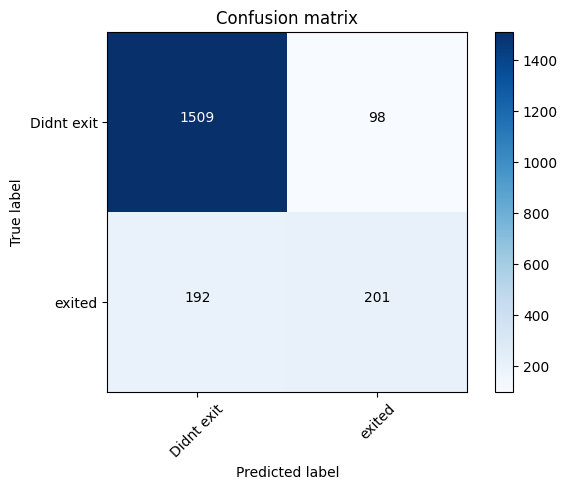

In [86]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_classes)

cm_plot_labels = ['Didnt exit', 'exited']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)